In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv("months.csv")
df

,day,A,S,O
0,1,55.5,52.19,46.92
1,2,39.2,42.51,37.24
2,3,31.7,35.39,30.12
3,4,33.0,36.31,31.04
4,5,27.1,23.79,18.52
5,6,22.0,25.31,20.04
6,7,9.7,6.39,1.12
7,8,6.2,9.51,4.24
8,9,11.5,14.81,NaN
9,10,1.6,-1.71,NaN


In [ ]:
x, days = df[["A", "S", "O"]], df["day"].values.reshape(-1, 1)

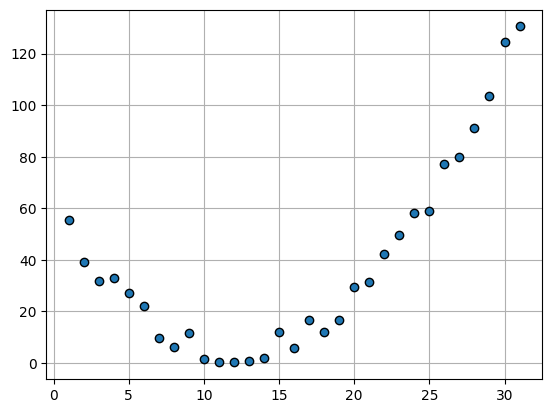

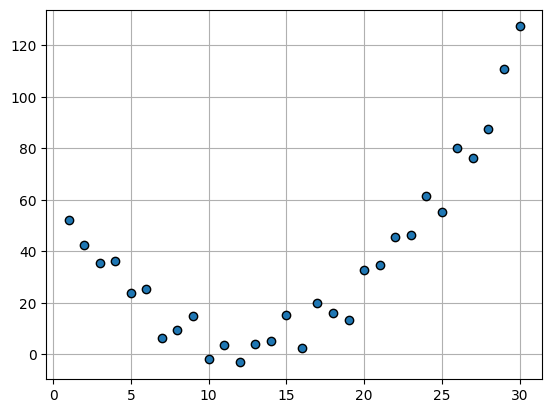

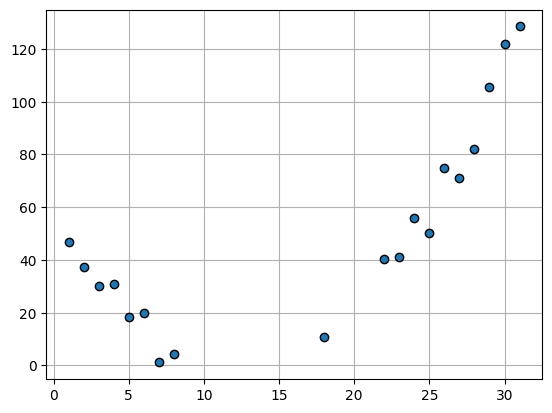

In [ ]:
for month in x.columns:
    plt.scatter(days, x[month], ec="k", zorder=3)

    plt.grid()
    plt.show()

In [ ]:
def make_model(days, x):
    mask = ~np.isnan(x)
    days, x = days[mask], x[mask]

    model = make_pipeline(
        PolynomialFeatures(3),
        LinearRegression()
    )

    model.fit(days, x)

    return model

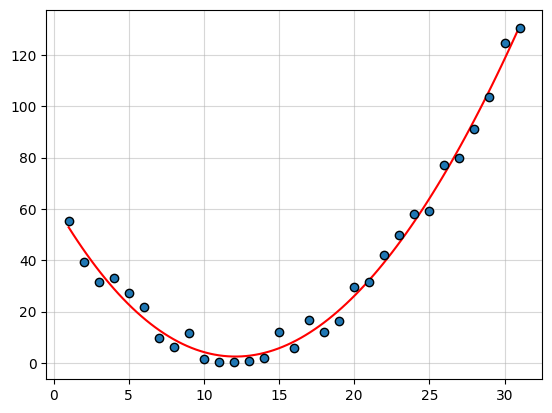

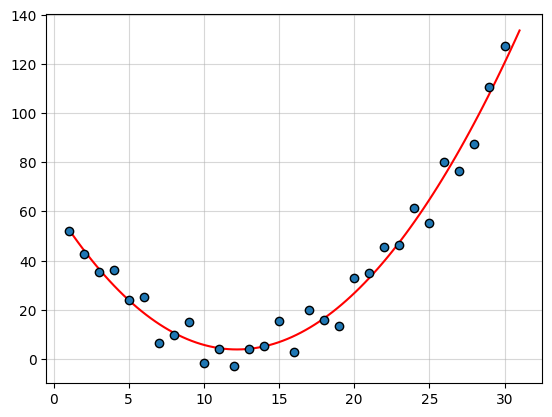

In [ ]:
for month in x.columns[:-1]:
    x_month = x[month].values
    model = make_model(days, x_month)

    x_days = np.linspace(1, len(x_month), 100).reshape(-1, 1)
    y_pred = model.predict(x_days)

    plt.scatter(days, x_month, ec="k", zorder=3)
    plt.plot(x_days, y_pred, c="r")

    plt.grid(alpha=.5)
    plt.show()

In [ ]:
df = pd.read_csv("months.csv")

days = df["day"].values.reshape(-1, 1)

august = df["A"].values
september = df["S"].values
october = df["O"].values

mask_august  = ~np.isnan(august)
mask_september = ~np.isnan(september)

days_august  = days[mask_august ]
days_september = days[mask_september]

august_clean = august[mask_august ]
september_clean = september[mask_september]

In [ ]:
days_combine = np.vstack([days_august , days_september])
values_combine = np.concatenate([august_clean, september_clean])

model_august_september = make_model(days_combine, values_combine)

In [ ]:
nan_october = np.isnan(october)
days_october = days[nan_october]

In [ ]:
pred_october = model_august_september.predict(days_october)

october_new = october.copy()
for i, day in enumerate(np.where(nan_october)[0]):
    october_new[day] = pred_october[i]

new_df = pd.DataFrame({
    "day": df["day"],
    "A": august,
    "S": september,
    "O": october,
    "O_new": october_new
})

new_df

,day,A,S,O,O_new
0,1,55.5,52.19,46.92,46.920000
1,2,39.2,42.51,37.24,37.240000
2,3,31.7,35.39,30.12,30.120000
3,4,33.0,36.31,31.04,31.040000
4,5,27.1,23.79,18.52,18.520000
5,6,22.0,25.31,20.04,20.040000
6,7,9.7,6.39,1.12,1.120000
7,8,6.2,9.51,4.24,4.240000
8,9,11.5,14.81,NaN,6.994111
9,10,1.6,-1.71,NaN,4.930251


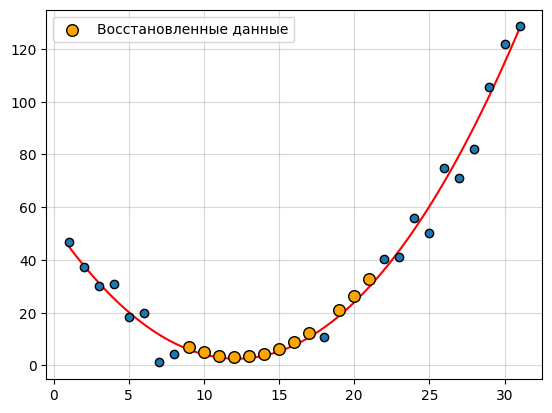

In [ ]:
x_month = new_df["O_new"].values
model = make_model(days, x_month)

x_days = np.linspace(1, len(x_month), 100).reshape(-1, 1)
y_pred = model.predict(x_days)

plt.scatter(days, x_month, ec="k", zorder=3)
plt.plot(x_days, y_pred, c="r")
plt.scatter(days_october, pred_october, ec="k", c="orange", s=70, label="Восстановленные данные", zorder=3)

plt.grid(alpha=.5)
plt.legend()
plt.show()

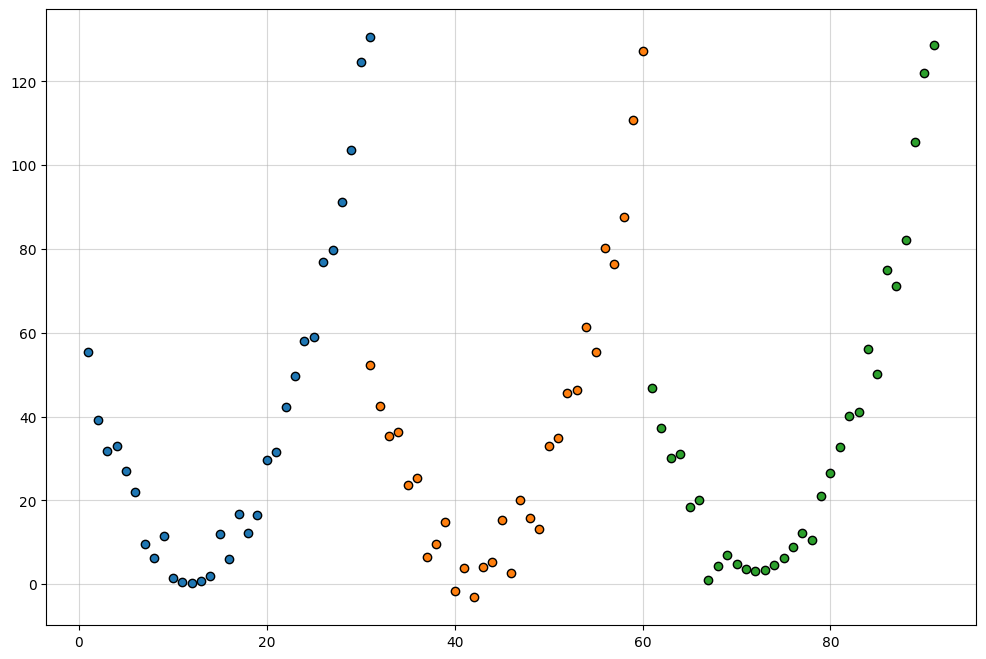

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(days, new_df["A"], ec="k", zorder=3)
plt.scatter(days + 30, new_df["S"], ec="k", zorder=3)
plt.scatter(days + 60, new_df["O_new"], ec="k", zorder=3)

plt.grid(alpha=.5)
plt.show()

In [ ]:
all_data = []

for column in df.columns:
    values = df[column].values
    
    for value in values:
        if not pd.isna(value):
            all_data.append(value)

df_all = pd.DataFrame({"All_Data": all_data})
df_all

,All_Data
0,1.00
1,2.00
2,3.00
3,4.00
4,5.00
...,...
106,71.12
107,82.24
108,105.54
109,122.02


In [ ]:
x = np.arange(len(df_all)).reshape(-1, 1)
y = df_all["All_Data"].values.reshape(-1, 1)

In [ ]:
poly = PolynomialFeatures(3)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_pred = model.predict(x_poly)

In [ ]:
new_df_cos = pd.DataFrame(np.concatenate([new_df["day"], new_df["day"], new_df["day"]]).reshape(-1, 1), columns=["day"])
new_df_cos["cos"] = np.cos((new_df_cos["day"] - 1))
new_df_cos

,day,cos
0,1,0.000000
1,2,0.032252
2,3,0.064471
3,4,0.096623
4,5,0.128675
...,...,...
88,27,0.743781
89,28,0.764953
90,29,0.785328
91,30,0.804886


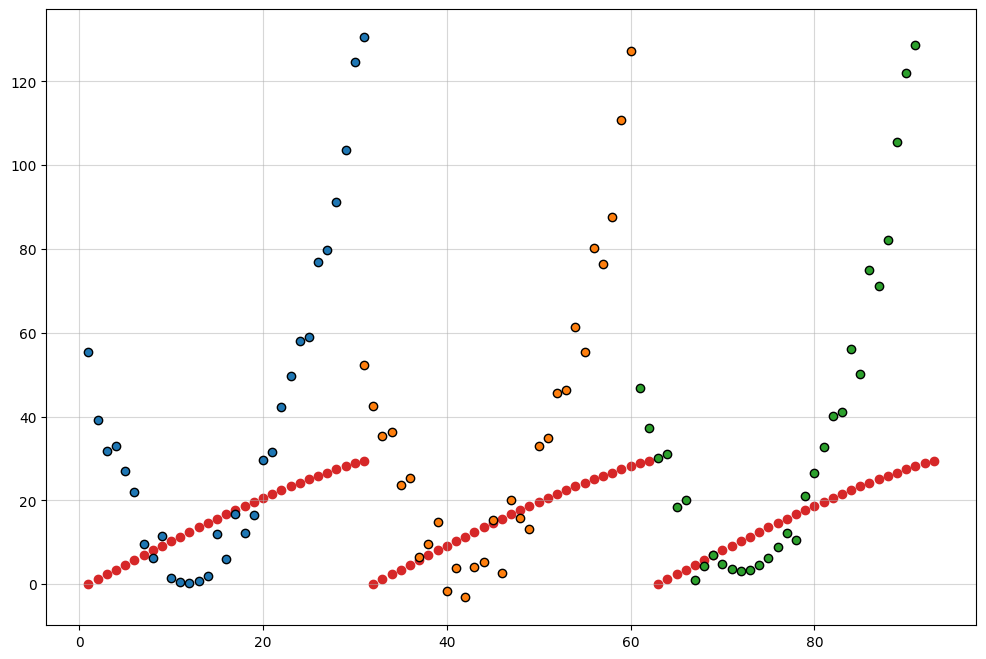

In [ ]:
Lin_model = LinearRegression().fit(new_df_cos["cos"].to_frame(), new_df_cos["day"].to_frame())
y_pred = Lin_model.predict(new_df_cos["cos"].to_frame())

plt.figure(figsize=(12, 8))

plt.scatter(days, new_df["A"], ec="k", zorder=3)
plt.scatter(days + 30, new_df["S"], ec="k", zorder=3)
plt.scatter(days + 60, new_df["O_new"], ec="k", zorder=3)

plt.scatter(np.linspace(1, 93, 93), y_pred)

plt.grid(alpha=.5)
plt.show()

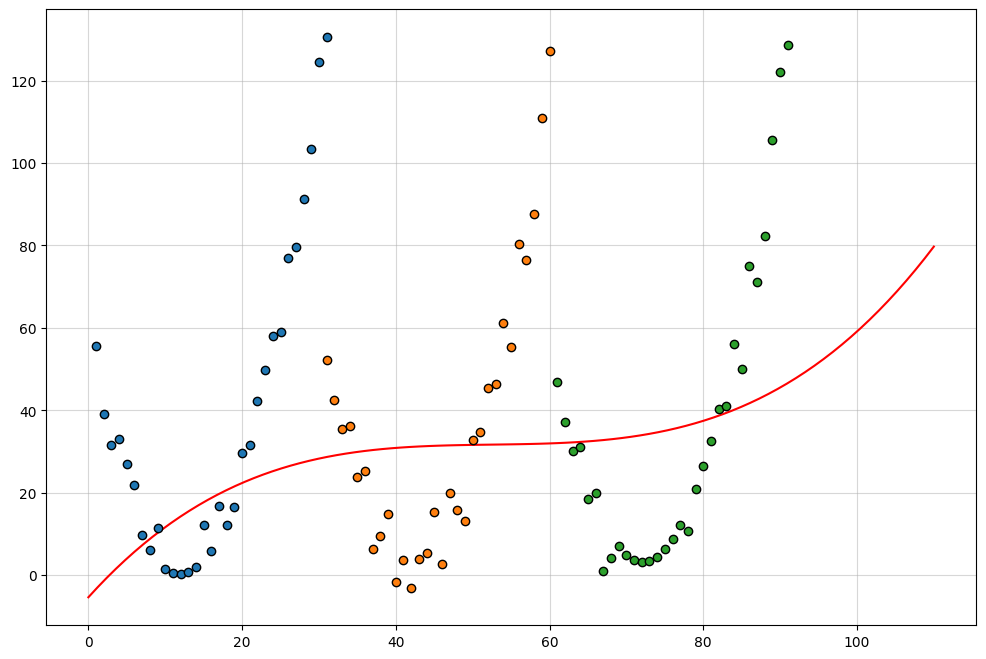

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(days, new_df["A"], ec="k", zorder=3)
plt.scatter(days + 30, new_df["S"], ec="k", zorder=3)
plt.scatter(days + 60, new_df["O_new"], ec="k", zorder=3)

x_pred = np.linspace(0, len(df_all) - 1, 93).reshape(-1, 1)
x_pred_poly = poly.transform(x_pred)
y_pred = model.predict(x_pred_poly)

plt.plot(x_pred, y_pred, c="r")


plt.grid(alpha=.5)
plt.show()

In [ ]:
df = pd.read_csv("months.csv")

df_train_aug = df.dropna(subset=["A"])
df_train_sep = df.dropna(subset=["S"])

X_aug = df_train_aug[["day"]].values
y_aug = df_train_aug["A"].values

X_sep = df_train_sep[["day"]].values
y_sep = df_train_sep["S"].values

In [ ]:
lin_reg_sep = LinearRegression()
lin_reg_sep.fit(X_sep, y_sep)
y_pred_lin_sep = lin_reg_sep.predict(X_sep)

poly = PolynomialFeatures(3)
X_poly_sep = poly.fit_transform(X_sep)

poly_reg_sep = LinearRegression()
poly_reg_sep.fit(X_poly_sep, y_sep)
y_pred_poly_sep = poly_reg_sep.predict(X_poly_sep)

In [ ]:
X_oct = df[["day"]].values

oct_lin_pred = lin_reg_sep.predict(X_oct)

X_poly_oct = poly.fit_transform(X_oct)
oct_poly_pred = poly_reg_sep.predict(X_poly_oct)

df["O_lin_pred"] = oct_lin_pred
df["O_poly_pred"] = oct_poly_pred

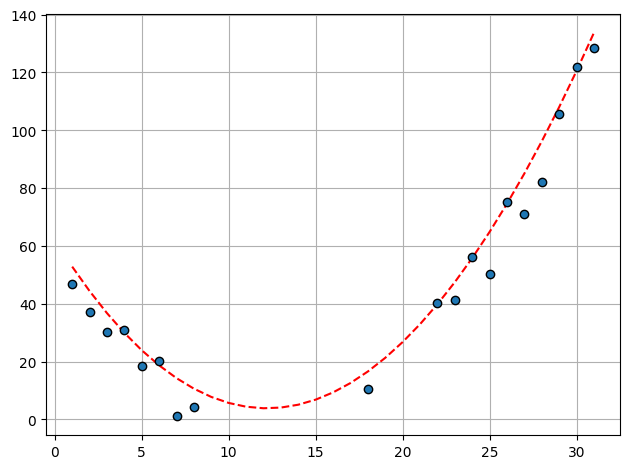

In [ ]:
plt.scatter(df["day"], df["O"], ec="k", zorder=3)
plt.plot(df["day"], df["O_poly_pred"], "r--")

plt.grid()

plt.tight_layout()
plt.show()